# Chapter 3 - 2

## k-최근접 이웃의 한계

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련, 최근접 이웃 개수 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

### 길이가 50cm인 농어의 무게 예측
- 실제 값이 더 많이 나간다고 함

In [8]:
print(knr.predict([[50]]))

[1033.33333333]


### 훈련 세트와 50cm 농어, 농어의 최근접 이웃을 산점도에 표시

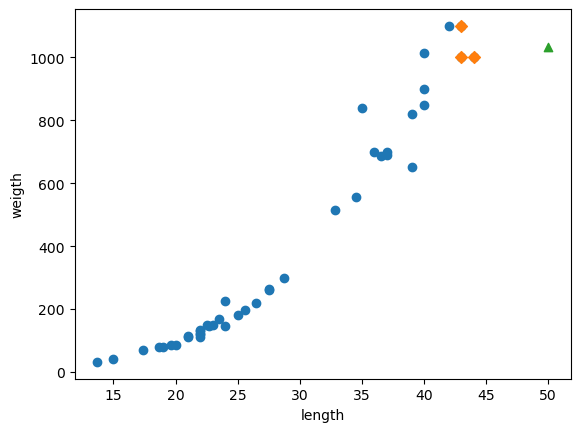

In [10]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

- 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [11]:
print(np.mean(train_target[indexes]))

1033.3333333333333


- 이웃 샘플의 타깃의 평균을 구하면 모델이 예측했던 값과 일치한다.
- 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음

In [12]:
print(knr.predict([[100]]))

[1033.33333333]


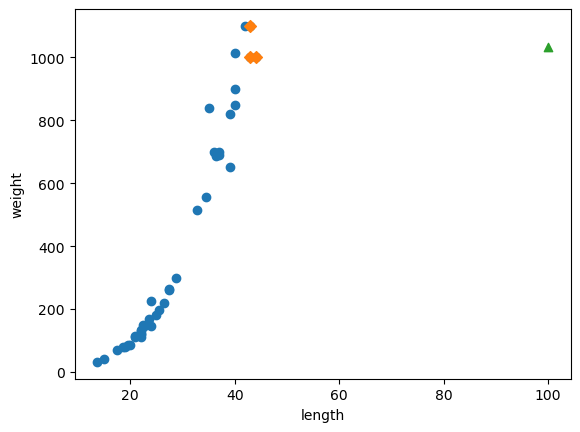

In [14]:
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 농어가 아무리 커도 무게가 늘어나지 않음
- k-최근접 이웃을 사용해 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야함

## 선형회귀 linear regression
- 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
- sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘 구현
- fit(), score(), predict() 메서드 있음

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


$
y = ax + b
$

### 직선의 기울기와 절편은 coef_와 intercept_ 속성에 저장
- 머신러닝에서 기울기를 coefficient 또는 weight라고 부른다

In [16]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 한다.
- 최적의 모델 파라미터를 찾는 것이 훈련 과정: 모델 기반 학습  
- k-최근접 이웃에는 모델 파라미터가 없다. 훈련 세트를 저장하는 것이 훈련의 전부이고 이를 사례 기반 학습이라고 함

### 농어의 길이 15에서 50까지의 직선과 훈련 세트 산점도 그리기

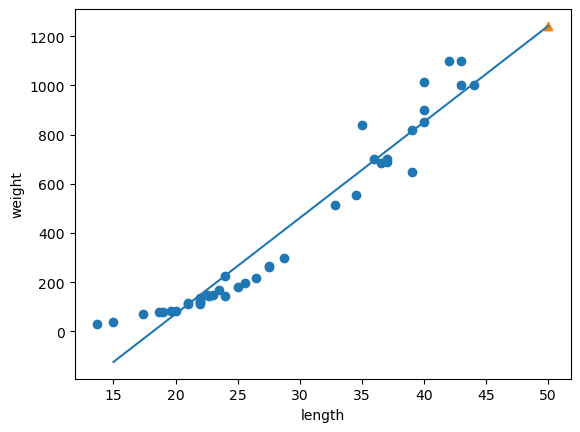

In [18]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 이 직선이 선형 회귀 알고리즘이 찾은 최적의 직선
- 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있음 

### 훈련 세트와 테스트 세트에 대한 결정계수 값: 전체적으로 과소적합
- 추가로, 직선이 왼쪽 아래로 쭉 뻗어있으면 농어의 무게가 0g 이하로 내려감

In [22]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


## 다향 회귀

- 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야함: column_stack() 함수

In [24]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


### train_poly를 이용해 2차 방정식 찾기
- 훈련 세트에 제곱 항을 추가했지만 타깃값은 그대로 사용
- 테스트할 때는 이 모델에 농어 길이의 제곱과 원래 길이를 함께 넣어줘야함

In [28]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [29]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


$
weight = 1.01 * length^2 - 21.6 * length + 116.05
$

### 이러한 방정식을 다항식이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀 polynomial regression라 부른다.

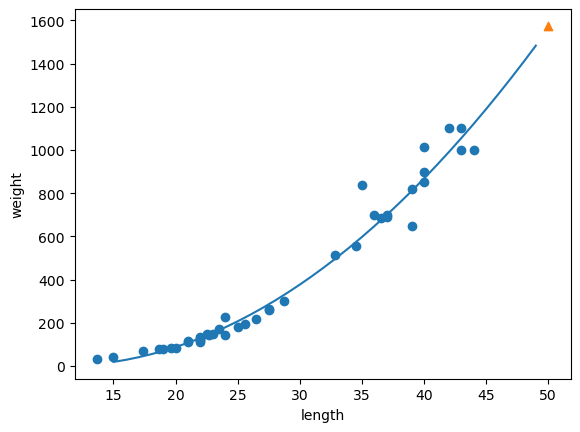

In [31]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트와 테스트 세트의 결정계수 값: 높아졌으나 과소적합이 아직 남아있음

In [33]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
